In [2]:

import pandas as pd
import os
import numpy as np
from collections import Counter
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib_venn import venn2
from matplotlib_venn import venn3



In [2]:
ruta_actual = os.path.abspath(os.getcwd())
print(os.listdir(ruta_actual))



['Disagreement.ipynb', 'Nueva global_180722.csv', '.ipynb_checkpoints', 'Local-nat-inter_070622_for BSC1.xlsx', 'Local-nat-inter_070622_for BSC1_actualizada.csv', 'Local-nat-inter_070622_for BSC1.csv', 'Global_Table_actualizada.ipynb', 'Nueva global_180722.xlsx', '.~lock.Nueva global_180722.csv#', 'counts.ipynb', 'Nueva global_180722(1).csv', 'Untitled12.ipynb', '.~lock.Local-nat-inter_070622_for BSC1.csv#']


## Tabla global

In [5]:
###Cambiar todos los diagnosticos de International por los diagnosticos de Noux International
df = pd.read_csv("Local-nat-inter_070622_for BSC1_actualizada.csv", sep='\t')
df = df.fillna("NaN")
df = df.replace(to_replace= 'HCN', value= 'NOS' )
df = df.replace(to_replace= 'HCN NOS', value= 'NOS' )

df = df.replace(to_replace= 'NOS - DOUBT', value= 'NOS' )


df['International'] = np.where(df['Nous DX International Jun 22'] != "NaN", df['Nous DX International Jun 22'], df['International'])


#Si un diagnostico alternativo coincide con el resto de columnas, se sustituye por el mismo valor 
df1 = df[['Local','National','International']]
df1 = df1.fillna("NaN")
for i in range(0, df.shape[0]):
    dff = df1.loc[i]
    dff_I = dff['International']
    dff_L= dff[ 'Local']
    dff_N = dff[ 'National']
    lista_L = dff['Local'].split(" ")
    lista_I = dff['International'].split(" ")
    lista_N = dff['National'].split(" ")
    if bool(set(lista_L) & set(lista_I) & set(lista_N)) == True :
        set_L = set(lista_L)
        set_N = set(lista_N)
        set_I = set(lista_I)
        set1 = set_L.intersection(set_N)
        intersection_set = set1.intersection(set_I)
        common_value = list(intersection_set)
        common_value = ''.join(common_value)
        common_value = str(common_value)
            
    
        df1.at[i, 'Local'] = common_value
        df1.at[i, 'National'] = common_value
        df1.at[i, 'International'] = common_value
        
df = df[["BSC ID", 'Local','National','International']]
df= df.fillna("NaN")
df["LvsN"] = ""
df["LvsI"] = ""
df["NvsI"] = ""
df["LvsNvsI"] = ""
df = df.fillna("NaN")

def disagreement(col1,col2, col3):#(col3=columna donde insertar 0,1 o NA)
    for i in range (df.shape[0]):
        if df1.loc[i][col1] == df1.loc[i][col2] and (df.loc[i][col1] != "NaN" or df.loc[i][col2] != "NaN"):
                df.at[i, col3] = 0
        elif df.loc[i][col1] == "NaN" or df.loc[i][col2] == "NaN":
                df.at[i, col3] = "NA"
        else:
            df.at[i, col3] = 1

def disagreement3 (col1, col2, col3, col4):#(col4=columna donde insertar 0,1 o NA)
    for i in range(df.shape[0]):
            if df.loc[i][col1] == "NaN" or df.loc[i][col2] == "NaN" or df.loc[i][col3] == "NaN":
                df.at[i, col4] = "NA"
            elif df.loc[i][col1] != df.loc[i][col2] != df.loc[i][col3]  and df.loc[i][col1] != df.loc[i][col3] and df.loc[i][col1] != "NaN" and df.loc[i][col2] != "NaN" and df.loc[i][col3] != "NaN":
                df.at[i, col4] = 1
            else:
                df.at[i, col4] = 0

            


disagreement("Local", "National", "LvsN")
disagreement("Local", "International", "LvsI")
disagreement("International", "National", "NvsI")
disagreement3("Local", "National", "International", "LvsNvsI")

df.to_clipboard()


In [4]:
###Cambiar todos los diagnosticos de International por los diagnosticos de Noux International
df = pd.read_csv("Local-nat-inter_070622_for BSC1_actualizada.csv", sep='\t')
df = df.fillna("NaN")
df = df.replace(to_replace= 'HCN', value= 'NOS' )
df = df.replace(to_replace= 'HCN NOS', value= 'NOS' )
df = df.replace(to_replace= 'HCN NOS || Other', value= 'NOS || Other' )
df = df.replace(to_replace= 'Rhabdo', value= 'Other' )
df = df.replace(to_replace= 'Ad', value= 'Other' )
df = df.replace(to_replace= 'Not possible', value= 'Other' )
df = df.replace(to_replace= 'NOS - DOUBT', value= 'NOS' )


df['International'] = np.where(df['Nous DX International Jun 22'] != "NaN", df['Nous DX International Jun 22'], df['International'])


#Si un diagnostico alternativo coincide con el resto de columnas, se sustituye por el mismo valor 
df1 = df[['Local','National','International']]
df1 = df1.fillna("NaN")
for i in range(0, df.shape[0]):
    dff = df1.loc[i]
    dff_I = dff['International']
    dff_L= dff[ 'Local']
    dff_N = dff[ 'National']
    lista_L = dff['Local'].split(" ")
    lista_I = dff['International'].split(" ")
    lista_N = dff['National'].split(" ")
    if bool(set(lista_L) & set(lista_I) & set(lista_N)) == True :
        set_L = set(lista_L)
        set_N = set(lista_N)
        set_I = set(lista_I)
        set1 = set_L.intersection(set_N)
        intersection_set = set1.intersection(set_I)
        common_value = list(intersection_set)
        common_value = ''.join(common_value)
        common_value = str(common_value)
            
    
        df1.at[i, 'Local'] = common_value
        df1.at[i, 'National'] = common_value
        df1.at[i, 'International'] = common_value
        
df = df[["BSC ID", 'Local','National','International']]
df= df.fillna("NaN")
df["LvsN"] = ""
df["LvsI"] = ""
df["NvsI"] = ""
df["LvsNvsI"] = ""
df = df.fillna("NaN")

def disagreement(col1,col2, col3):#(col3=columna donde insertar 0,1 o NA)
    for i in range (df.shape[0]):
        if df1.loc[i][col1] == df1.loc[i][col2] and (df.loc[i][col1] != "NaN" or df.loc[i][col2] != "NaN"):
                df.at[i, col3] = 0
        elif df.loc[i][col1] == "NaN" or df.loc[i][col2] == "NaN":
                df.at[i, col3] = "NA"
        else:
            df.at[i, col3] = 1

def disagreement3 (col1, col2, col3, col4):#(col4=columna donde insertar 0,1 o NA)
    for i in range(df.shape[0]):
            if df.loc[i][col1] == "NaN" or df.loc[i][col2] == "NaN" or df.loc[i][col3] == "NaN":
                df.at[i, col4] = "NA"
            elif df.loc[i][col1] != df.loc[i][col2] != df.loc[i][col3]  and df.loc[i][col1] != df.loc[i][col3] and df.loc[i][col1] != "NaN" and df.loc[i][col2] != "NaN" and df.loc[i][col3] != "NaN":
                df.at[i, col4] = 1
            else:
                df.at[i, col4] = 0

            


disagreement("Local", "National", "LvsN")
disagreement("Local", "International", "LvsI")
disagreement("International", "National", "NvsI")
disagreement3("Local", "National", "International", "LvsNvsI")

df.to_clipboard()



# Grafico Disagreement


## Grafico sin categoría not possible

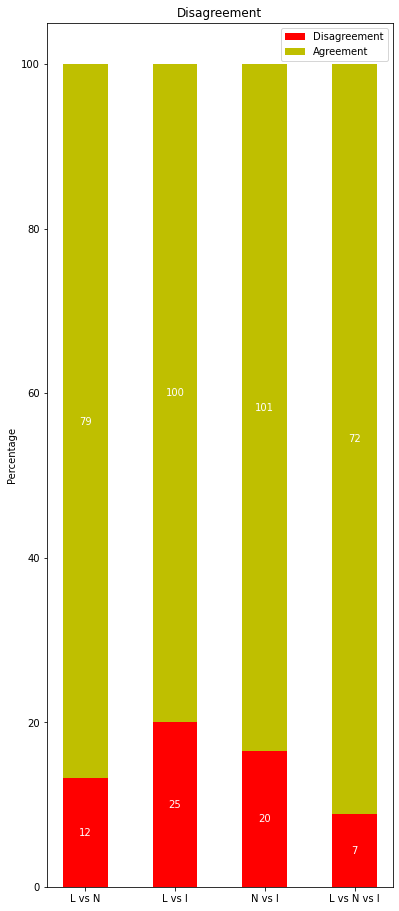

     BSC ID        Local National International LvsN LvsI NvsI LvsNvsI
0       170           HB       HB            HB    0    0    0       0
1       171          HCC      HCC           HCC    0    0    0       0
2       172           HB       HB            HB    0    0    0       0
3       173  HB || Other       HB            HB    0    0    0       0
4       174           HB       HB            HB    0    0    0       0
..      ...          ...      ...           ...  ...  ...  ...     ...
276     474          HCC      NaN           HCC   NA    0   NA      NA
277     475           HB      NaN           NaN   NA   NA   NA      NA
278     476          NaN      NaN            HB   NA   NA   NA      NA
279     477          NaN      NaN            HB   NA   NA   NA      NA
280     478          NaN      NaN            HB   NA   NA   NA      NA

[281 rows x 8 columns]


In [5]:
df_agr = df.loc[:, "LvsN":"LvsNvsI"]
x = []
y1 = []
y2 = []
y3 = []
N1 = []
N0 = []
Nna = []
for i in [ "LvsN", "LvsI", "NvsI", "LvsNvsI"]:
    a = df_agr[i].value_counts()
    x.append(i)
    suma = a[1] + a[0] 
    y1.append(a[1]/suma*100)
    y2.append(a[0]/suma*100)
    N0.append(a[0])
    N1.append(a[1])
    

labels = x
zero_per = y2
one_per = y1

width = 0.50       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

    

p1 = ax.bar(labels, one_per, width, label='Disagreement', color="r")
p2 = ax.bar(labels, zero_per, width,  bottom=one_per, label='Agreement', color="y")

ax.set_ylabel('Percentage', )
ax.set_title('Disagreement')
ax.legend()
ax.bar_label(p1, N1,  label_type='center',color="w" )
ax.bar_label(p2, N0, label_type='center', color="w")
plt.xticks(np.arange(4),("L vs N", "L vs I", "N vs I", "L vs N vs I" ))
plt.subplots_adjust(left=0.1, right=0.9, top=5, bottom=2)

plt.show()
print(df)

In [6]:
print(df["LvsN"].value_counts())
print(df["LvsI"].value_counts())
print(df["NvsI"].value_counts())
print(df["LvsNvsI"].value_counts())


NA    190
0      79
1      12
Name: LvsN, dtype: int64
NA    156
0     100
1      25
Name: LvsI, dtype: int64
NA    160
0     101
1      20
Name: NvsI, dtype: int64
NA    202
0      72
1       7
Name: LvsNvsI, dtype: int64


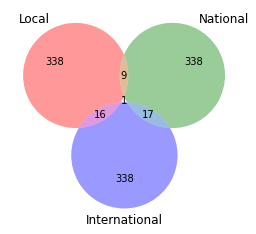

In [7]:
venn3(subsets = (338, 338, 9, 338, 16, 17, 1), set_labels = ('Local', 'National', 'International'))
plt.savefig("VennDiagram.png")